In [2]:
from pathlib import Path
from datatree import DataTree
import datatree
import xarray as xr
import matplotlib.pyplot as plt
import dask

import valenspy as vp
from valenspy.cf_checks import cf_status, is_cf_compliant

In [47]:
PATH=Path('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/data/climate_explorer/CMIP6/Monthly/tas')
#Make a datatree by iterating over the subdirectories and then the files
tree_dict = {}
for ssp in PATH.iterdir():
    ssp_name = ssp.name
    if ssp.is_dir():
        for file in ssp.iterdir():
            ds = xr.open_dataset(file, chunks="auto")
            #If the time dimension is not a datetime object, convert it
            if not isinstance(ds['time'].values[0], np.datetime64):
                ds['time']=ds.indexes['time'].to_datetimeindex()
            #Convert the time dimension to 
            tree_dict[f"{ssp_name}/{ds.attrs['parent_source_id']}"] = ds
dt = DataTree.from_dict(tree_dict)
dt

/tmp/ipykernel_3813862/1265312581.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time']=ds.indexes['time'].to_datetimeindex()
/tmp/ipykernel_3813862/1265312581.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time']=ds.indexes['time'].to_datetimeindex()
/tmp/ipykernel_3813862/1265312581.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between date

DataTree('None', parent=None)
├── DataTree('ssp585')
│   ├── DataTree('GFDL-ESM4')
│   │       Dimensions:  (lat: 144, lon: 192, time: 3012)
│   │       Coordinates:
│   │           height   float64 8B ...
│   │         * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
│   │         * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
│   │         * time     (time) datetime64[ns] 24kB 1850-01-16T12:00:00 ... 2100-12-16T12...
│   │       Data variables:
│   │           tas      (time, lat, lon) float32 333MB dask.array<chunksize=(1213, 144, 192), meta=np.ndarray>
│   │       Attributes: (12/52)
│   │           CDI:                       Climate Data Interface version ?? (http://mpim...
│   │           history:                   Thu Jun 24 10:38:59 2021: ncks -v tas tas_mon_...
│   │           source:                    GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cubed-sp...
│   │           institution:               National Oceanic and Atmospheric Administratio...
│   │           Conventions:               CF-1.7 CMIP-6.0 UGRID-1.0
│   │           external_variables:        areacella
│   │           ...                        ...
│   │           variant_label:             r1i1p1f1
│   │           cmip6-ng:                  \ncontact = cmip6-archive@env.ethz.ch\ndescrip...
│   │           original_file_names:       /net/atmos/data/cmip6/historical/Amon/tas/GFDL...
│   │           original_file_hash_codes:  e057084ec0465ff122f8bf6b8ab4e98d3c5e96a3504776...
│   │           CDO:                       Climate Data Operators version 1.9.3 (http://m...
│   │           NCO:                       4.7.2
│   ├── DataTree('GISS-E2-1-G')
│   │       Dimensions:  (lat: 144, lon: 192, time: 3012)
│   │       Coordinates:
│   │           height   float64 8B ...
│   │         * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
│   │         * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
│   │         * time     (time) datetime64[ns] 24kB 1850-01-16T12:00:00 ... 2100-12-16T12...
│   │       Data variables:
│   │           tas      (time, lat, lon) float32 333MB dask.array<chunksize=(1213, 144, 192), meta=np.ndarray>
│   │       Attributes: (12/54)
│   │           CDI:                       Climate Data Interface version ?? (http://mpim...
│   │           history:                   Thu Jun 24 10:42:29 2021: ncks -v tas tas_mon_...
│   │           source:                    GISS-E2.1G (2019): \naerosol: Varies with phys...
│   │           institution:               Goddard Institute for Space Studies, New York,...
│   │           Conventions:               CF-1.7 CMIP-6.2
│   │           activity_id:               CMIP
│   │           ...                        ...
│   │           cmor_version:              3.3.2
│   │           cmip6-ng:                  \ncontact = cmip6-archive@env.ethz.ch\ndescrip...
│   │           original_file_names:       /net/atmos/data/cmip6/historical/Amon/tas/GISS...
│   │           original_file_hash_codes:  3fc801bb6e8216909ed6b886898518962a6d3c837a7aa8...
│   │           CDO:                       Climate Data Operators version 1.9.3 (http://m...
│   │           NCO:                       4.7.2
│   ├── DataTree('HadGEM3-GC31-MM')
│   │       Dimensions:  (lat: 144, lon: 192, time: 3012)
│   │       Coordinates:
│   │           height   float64 8B ...
│   │         * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
│   │         * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
│   │         * time     (time) datetime64[ns] 24kB 1850-01-16 1850-02-16 ... 2100-12-16
│   │       Data variables:
│   │           tas      (time, lat, lon) float32 333MB dask.array<chunksize=(1213, 144, 192), meta=np.ndarray>
│   │       Attributes: (12/53)
│   │           CDI:                       Climate Data Interface version ?? (http://mpim...
│   │           history:                   Thu

In [50]:
ds=dt['ssp585/ACCESS-CM2'].ds
ds

<xarray.DatasetView> Size: 333MB
Dimensions:  (lat: 144, lon: 192, time: 3012)
Coordinates:
    height   float64 8B ...
  * lat      (lat) float32 576B -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 24kB 1850-01-16T12:00:00 ... 2100-12-16T12...
Data variables:
    tas      (time, lat, lon) float32 333MB dask.array<chunksize=(1213, 144, 192), meta=np.ndarray>
Attributes: (12/53)
    CDI:                       Climate Data Interface version ?? (http://mpim...
    history:                   Thu Jun 24 08:57:19 2021: ncks -v tas tas_mon_...
    source:                    ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode...
    institution:               CSIRO (Commonwealth Scientific and Industrial ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    ...                        ...
    license:                   CMIP6 model data produced by CSIRO is licensed...
    cmip6-ng:                  \ncontact = cmip6-archive@env.ethz.ch\ndescrip...
    original_file_names:       /net/atmos/data/cmip6/historical/Amon/tas/ACCE...
    original_file_hash_codes:  3e106e8430f04cd2b260a7230b1e461ccebdda338d09e3...
    CDO:                       Climate Data Operators version 1.9.3 (http://m...
    NCO:                       4.7.2

In [97]:
def warming_levels(ds, ref, levels=[1.5, 2.0], rol_years=21, freq_monthly=True):
    """
    Calculate the crossing times for different warming levels - the time when the area average warming crosses a certain level compared to the reference period

    Parameters
    ----------
    ds : xarray.Dataset
        Dataset containing the model data
    ref : xarray.Dataset
        Dataset containing the reference period
    levels : list
        List of warming levels to get crossing times for
    rol_years : int
        Number of years to use for the rolling mean
    freq : str, optional
        Frequency of the data (following pandas conventions), default is None and will be inferred from the data
    
    Returns
    -------
    crossingtimes : dict
        Dictionary containing the crossing times for each warming level
    temp_warming : xarray.DataArray
        DataArray containing the area average warming compared to the reference period
    """
    if not freq_monthly:
        ds = ds.resample(time="ME").mean()
    warming_ds = temp_warming(ds, ref, rol_amount=rol_years*12)
    warming_ds = warming_ds.compute()
    crossingtimes = {}
    for level in levels:
        try:
            crossingtimes[level] = warming_ds.where(warming_ds>level, drop=True).idxmin('time').astype('datetime64[ns]').values
        except ValueError:
            crossingtimes[level] = False
    return warming_ds, crossingtimes

def temp_warming(ds, ref, rol_amount):
    """
    Calculate the area average warming compared to the reference period

    Parameters
    ----------
    ds : xarray.Dataset
        Dataset containing the model data
    ref : xarray.Dataset
        Dataset containing the reference period
    rol_years : int
        Number of years to use for the rolling mean
    
    Returns
    -------
    ds_temp_warming : xarray.DataArray
        DataArray containing the area average warming compared to the reference period
    """
    ref_temp = ref.tas.mean()
    rol = ds.mean(dim=['lat','lon']).tas.rolling(time=rol_amount).mean()
    ds_temp_warming = rol - ref_temp

    return ds_temp_warming
    
def crossing_time_plot(tw_ds, ct, ax, detailed=True, **kwargs):
    #Use the hot cold colormap
    cmap = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(ct)))

    for level, color in zip(ct, cmap):
        if ct[level]:
            if detailed:
                ax.axhline(level, color=color, linestyle='--', alpha=0.7, label=f'{level:.2f}°C warming level: {np.datetime_as_string(ct[level], unit="M")}')
                ax.axvline(ct[level], color=color, linestyle='--', alpha=0.4)
            else:
                #Map the level
                
                ax.scatter(ct[level], level, color=color, label=f'{level:.2f}°C warming level: {np.datetime_as_string(ct[level], unit="M")}')
    tw_ds.plot(ax=ax, **kwargs)
    if detailed:
        ax.legend()
    ax.set_ylabel('Temperature anomaly (°C) compared to 1850-1900')
    ax.set_xlabel('Time')
    return ax

def crossing_time_plot_2(tw_ds, ct, ax, detailed=True, **kwargs):
    

In [98]:
from functools import partial
warming_level = vp.Model2Ref(warming_levels, crossing_time_plot, 'Warming levels', 'Calculate the crossing times for different warming levels')

In [99]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler
ref_temp_GWL = ds.sel(time=slice('1850', '1900'))

with ProgressBar():
    result_GWLs = warming_level.apply(ds, ref_temp_GWL, levels=[0.5, 0.78, 1, 1.5, 2, 3], rol_years=30)

[########################################] | 100% Completed | 1.89 sms


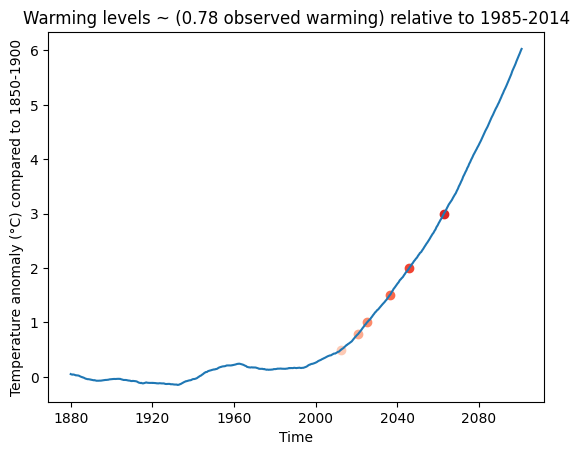

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
warming_level.visualize(result_GWLs, detailed=False)
plt.title('Warming levels ~ (0.78 observed warming) relative to 1985-2014')
plt.show()

In [55]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler
ref_temp_AWL = ds.sel(time=slice('1985', '2014'))

levels=[f-0.78 for f in [1, 1.5, 2, 3]]

with ProgressBar():
    result_GWLs = warming_level.apply(ds, ref_temp_AWL, levels=levels, rol_years=30)

[                                        ] | 0% Completed | 397.82 us

[########################################] | 100% Completed | 1.63 sms


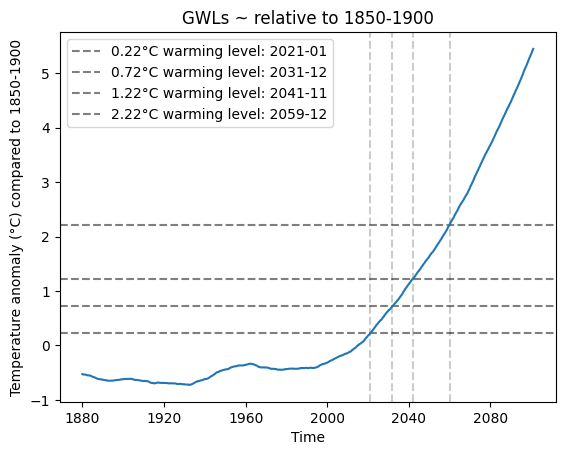

In [56]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
warming_level.visualize(result_GWLs)
plt.title('GWLs ~ relative to 1850-1900')
plt.show()

## Ensemble tests

In [102]:
warming_level_ensemble = vp.Ensemble2Ref.from_model2ref(warming_level)

In [108]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler
ref = dt.sel(time=slice('1850', '1900')) #Or use a different reference for each model - the same data tree structure is expected

with ProgressBar():
    result = warming_level_ensemble.apply(dt, ref, levels=[0.5, 0.78, 1, 1.5, 2, 3], rol_years=30)

[########################################] | 100% Completed | 1.75 sms
[########################################] | 100% Completed | 2.05 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 2.13 sms
[########################################] | 100% Completed | 1.65 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 1.66 sms
[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 1.52 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 1.52 sms
[########################################] | 100% Completed | 2.72 ss
[######

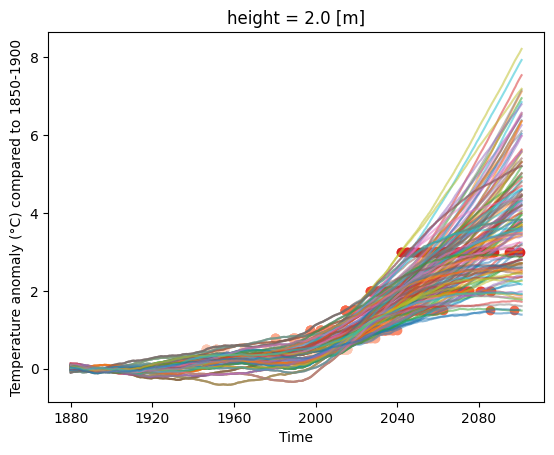

In [110]:

fig, ax = plt.subplots()
warming_level_ensemble.visualize(result, facetted=False, detailed=False, alpha=0.5)
plt.show()

# Regional Warming tests

In [5]:
import regionmask

def regional_warming_ratio(ds, ref, rol_years=21, freq_monthly=True, regions=None):
    """
    Calculate the crossing times for different warming levels - the time when the area average warming crosses a certain level compared to the reference period

    Parameters
    ----------
    ds : xarray.Dataset
        Dataset containing the model data
    ref : xarray.Dataset
        Dataset containing the reference period
    levels : list
        List of warming levels to get crossing times for
    rol_years : int
        Number of years to use for the rolling mean
    freq : str, optional
        Frequency of the data (following pandas conventions), default is None and will be inferred from the data
    
    Returns
    -------
    crossingtimes : dict
        Dictionary containing the crossing times for each warming level
    temp_warming : xarray.DataArray
        DataArray containing the area average warming compared to the reference period
    """
    if not freq_monthly:
        ds = ds.resample(time="ME").mean()
    warming_ds = temp_warming(ds, ref, rol_amount=rol_years*12)
    if regions:
        mask = regionmask.defined_regions.prudence.mask_3D(ds)
        regional_warming_ds = ds.groupby(mask)

    warming_ratio = regional_warming_ds / warming_ds
    #Drop inifinite values both positive and negative
    warming_ratio = warming_ratio.where((warming_ratio < 1e10) & (warming_ratio > -1e10), drop=True)
    
    return warming_ds, regional_warming_ds, warming_ratio

def regional_warming_plot(warming_ds, regional_warming_ds, warming_ratio, ax,regions, **kwargs):
    ax_ratio = ax.twinx()
    if regions:
        warming_ds.plot(ax=ax, label='Global', **kwargs)
        regional_warming_ds.plot(ax=ax, hue='region', **kwargs)
        warming_ratio.plot(ax=ax_ratio, hue='region', linestyle='--', **kwargs)
    else:
        for ds, label in zip([warming_ds, regional_warming_ds], ['Global', 'Regional']):
            ds.plot(ax=ax, label=label, **kwargs)
        warming_ratio.plot(ax=ax_ratio, linestyle='--', **kwargs)
    ax_ratio.set_ylabel('Regional Warming Ratio')
    ax.legend()
    return ax

In [7]:
reg_warming = vp.Model2Ref(regional_warming_ratio, regional_warming_plot, 'regional_warming', 'Regional warming compared to global warming')

from dask.diagnostics import ProgressBar
ref_temp_AWL = ds.sel(time=slice('1850', '1900'))
with ProgressBar():
    result = reg_warming.apply(ds, ref_temp_AWL, rol_years=30, freq_monthly=False, regions=True)

KeyError: 'region'

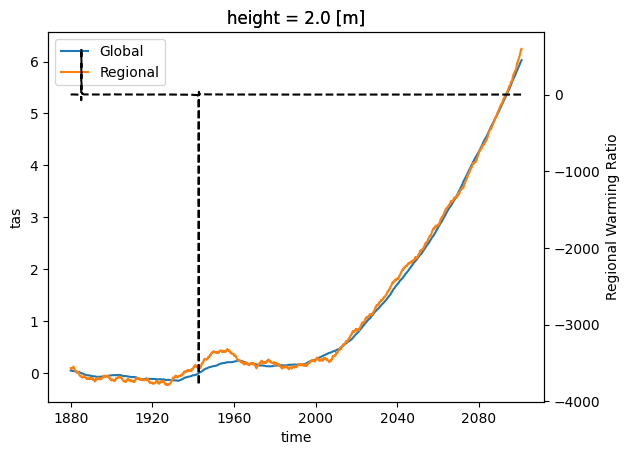

In [ ]:
fig, ax = plt.subplots()
reg_warming.visualize(result)
plt.show()